### Урок 5. Домашняя работа

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как в уроке
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [1]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

In [3]:
x_hw = np.array([[50], [60], [70], [100]])
y_hw = np.array([[10], [15], [40], [45]])

x_hw

array([[ 50],
       [ 60],
       [ 70],
       [100]])

In [4]:
w = inv(
    (x_hw.T).dot(x_hw)
).dot(
    x_hw.T).dot(y_hw)
w

array([[0.41428571]])

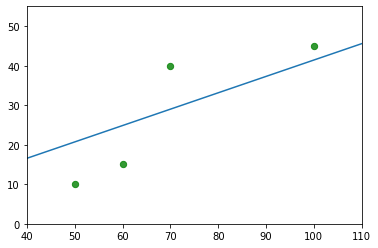

In [5]:
# Задаем границы координатных осей
margin = 10
x_min = x_hw[:].min() - margin
x_max = x_hw[:].max() + margin

# Набор точек чтобы нарисовать прямую
x_support = np.linspace(x_min, x_max, num=100)
# Предсказание нашей модели
y_model = w[0] * x_support

# Настройка графика
plt.xlim(x_min, x_max)
plt.ylim(0, y_hw[:].max() + margin)

# Рисуем исходные точки
plt.scatter(x_hw[:], y_hw[:], 40, 'g', 'o', alpha=0.8)
# Предсказание модели
plt.plot(x_support, y_model)

plt.show()

### Урок7.  Домашняя работа

У вас есть два набора точек – истинные значения *y_true* и предсказанные значения *y_pred*

* для каждой точки из *y_true* постройте величину ошибки $e = y-\hat{y}$ – это называется **остатки регрессии**
* возведите ошибки в квадрат $e^2$
* постройте график ошибок – зависимость $e^2$ от $e$

In [6]:
import numpy as np

y_pred_ = np.array([30.0, 25.03, 30.57, 28.61, 27.94, 25.26, 23.0, 19.54, 11.52, 18.92, 19.0, 21.59, 20.91, 19.55, 19.28, 19.3, 20.53, 16.91, 16.18, 18.41, 12.52, 17.67, 15.83, 13.81, 15.68, 13.39, 15.46, 14.71, 19.55, 20.88, 11.46, 18.06, 8.81, 14.28, 13.71, 23.81, 22.34, 23.11, 22.92, 31.36])
y_true_ = np.array([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8])

График должен получится вот такой:

![experiment_errors](https://sun9-50.userapi.com/c856120/v856120638/1e9be0/3m-6-p2kZfk.jpg)

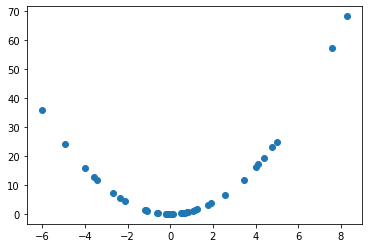

In [7]:
from matplotlib import pyplot as plt

%matplotlib inline

e = y_true_ - y_pred_
e2 = e**2

plt.scatter(e, e2)

### Урок 9. Домашняя работа

Даны точки $x$ и значения в этих точках $y$. Нормализуйте $y$ с помощью *z-score* и постройте график зависимости нормализованных значений от $x$. Для графика используйте `.scatter(x,y_tansformed)`

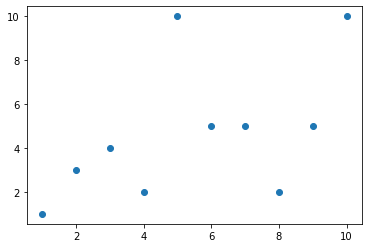

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

x = np.linspace(1,10,num=10)
y = np.array(
    [1.,  3.,  4.,  2., 10.,  5.,  5.,  2.,  5., 10.],
    dtype=np.float32
)
plt.scatter(x, y)

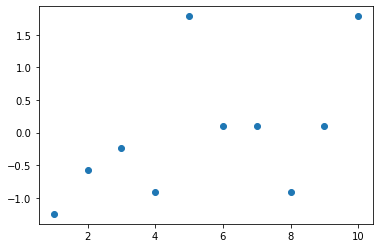

In [9]:
y_transformed = StandardScaler().fit_transform(y.reshape(-1, 1)).reshape(-1)

plt.scatter(x, y_transformed)

### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

In [3]:
data = pd.read_csv('../non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [17]:
def generate_degrees(source_data: list, degree: int):
    '''Функция, которая принимает на вход одномерный массив, а возвращает n-мерный.
    Для каждой степени от 1 до degree возводим x в эту степень'''
    return np.array([
        source_data**n for n in range(1, degree + 1)
    ]).T

In [23]:
def train_polynomial(degree, data):
    '''Генерируем данные, тренируем модель, дополнительно рисуем график'''
    X = generate_degrees(data.x_train, degree)
    model = LinearRegression().fit(X, data.y_train)
    y_pred = model.predict(X)
    error = r2_score(data.y_train, y_pred)
    print('Степень полинома: %d, Ошибка: %.3f' % (degree, error))

In [24]:
for i in range(1, 11):
    degree = i
    train_polynomial(degree, data)

Степень полинома: 1, Ошибка: 0.519
Степень полинома: 2, Ошибка: 0.533
Степень полинома: 3, Ошибка: 0.888
Степень полинома: 4, Ошибка: 0.895
Степень полинома: 5, Ошибка: 0.896
Степень полинома: 6, Ошибка: 0.899
Степень полинома: 7, Ошибка: 0.900
Степень полинома: 8, Ошибка: 0.909
Степень полинома: 9, Ошибка: 0.909
Степень полинома: 10, Ошибка: 0.909


In [28]:
degree = 8

X = generate_degrees(data.x_train, degree)
model = LinearRegression().fit(X, data.y_train)
y_pred = model.predict(X)
y_pred

array([ 0.8982192 ,  1.01833172,  1.19453825,  1.92126952,  1.90546896,
        1.9600516 ,  1.98512499,  1.99230585,  2.04249588,  2.05136614,
        2.06577704,  2.08311833,  2.0874128 ,  2.07883136,  1.98989254,
        1.7306022 ,  1.24989433,  1.18596079,  1.0238444 ,  0.98866648,
        0.86927939,  0.85278186,  0.47522397,  0.43930521,  0.30467736,
        0.274081  ,  0.221724  ,  0.21864437,  0.18980154,  0.16093067,
        0.16093067,  0.15803904,  0.14794112,  0.12059033,  0.06968902,
        0.06116563,  0.04748007,  0.04239532, -0.01204588,  0.01537075,
        0.02776741,  0.08566733,  0.12574163,  0.23637004,  0.27531778,
        0.36112264,  0.51579337,  0.94696916,  0.94891823,  0.94891823])

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [5]:
class CustomLinearReg:
    def __init__(self):
        self.w = None
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.w = np.linalg.inv(
            X.T.dot(X)
        ).dot(
            X.T
        ).dot(
            y
        )
    
    def predict(self, X):
        Y_model = self.w[1][0]*X + self.w[0][0]
        return Y_model

In [6]:
reg = CustomLinearReg()
X = data.x_train.values.reshape(-1, 1)
y = data.y_train.values.reshape(-1, 1)
reg.fit(X, y)

In [7]:
y_pred = reg.predict(X)

In [8]:
print(r2_score(y_pred, y))

0.07495867693964553


**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [104]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [105]:
boston_dataset = load_boston()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(boston_dataset['data'], boston_dataset['target'], test_size=0.2, random_state=10)

In [107]:
reg = LinearRegression().fit(X_train, y_train)

In [108]:
y_pred = reg.predict(X_test)

In [109]:
print(r2_score(y_test, y_pred))

0.6709339839115642


In [110]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [111]:
reg2 = LinearRegression().fit(X_train, y_train)

In [112]:
y_pred2 = reg2.predict(X_test)

In [113]:
print(r2_score(y_test, y_pred2))

0.6709339839115636


In [114]:
# Значение R2_score не изменилось